# Final Project 

### Problem Statement: Identify poisonous and edible mushrooms

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### 1. Import mushrooms dataset

In [189]:
mushrooms_data = pd.read_csv('./mushrooms.csv')

### Attribute Information
#### target: edible=e, poisonous=p

#### features:
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


### 2. Examine mushrooms dataset

In [190]:
mushrooms_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [191]:
mushrooms_data.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [192]:
mushrooms_data.shape

(8124, 23)

In [193]:
mushrooms_data.dtypes
# features are all categorial values

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [194]:
mushrooms_data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [195]:
mushrooms_data.isnull().sum()
# no null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Text(0.5,0,'Class: edible/poisonous')

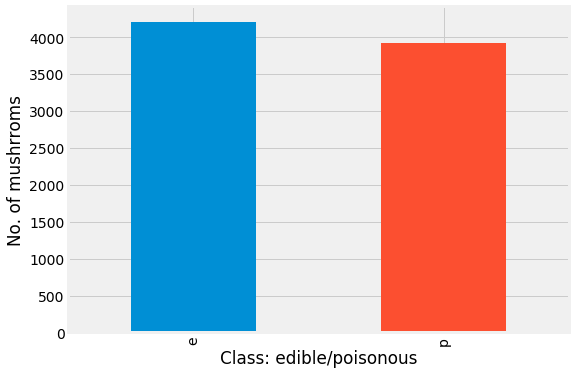

In [196]:
mushrooms_data['class'].value_counts().plot(kind = 'bar')
plt.ylabel("No. of mushrroms")
plt.xlabel("Class: edible/poisonous")

# relatively balanced dataset

In [197]:
mushrooms_data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [198]:
features = mushrooms_data.columns.tolist()

for feat in features:
    if feat != 'class':
        print(mushrooms_data[feat].value_counts())

# the feature veil-type only has 1 single value!

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surface-above-ring, dtype: int64
s    4936
k    23

In [199]:
#drop feature with no purpose
mushrooms_data.drop(labels='veil-type',axis=1, inplace=True)

In [200]:
mushrooms_data[mushrooms_data.duplicated()]
# no duplicate instances detected

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat


### 4. Visualize the mushrooms dataset

Text(0.5,0,'No. of mushrroms')

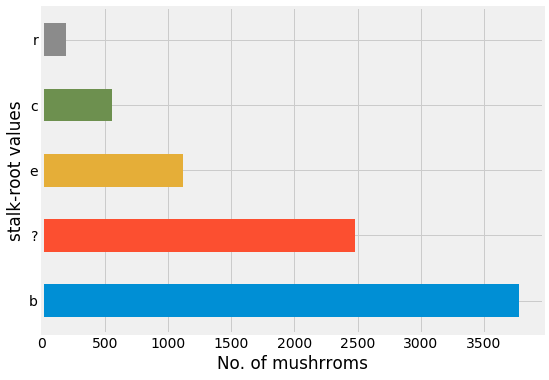

In [201]:
mushrooms_data['stalk-root'].value_counts().plot(kind='barh');
plt.ylabel("stalk-root values")
plt.xlabel("No. of mushrroms")
#many missing values in stalk-root feature!

In [202]:
#drop feature since difficult to fillna
mushrooms_data.drop(labels='stalk-root',axis=1, inplace=True)

#### Since the dataset has categorial values only, use LabelEncoder to convert it to integer values, so that we can find correlation between the features and class label

In [203]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
mushrooms_encoded = pd.DataFrame()

for column in mushrooms_data.columns:
    if(column != 'veil-type' and column != 'stalk-root'):
        mushrooms_encoded[column] = labelencoder.fit_transform(mushrooms_data[column])
    
mushrooms_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


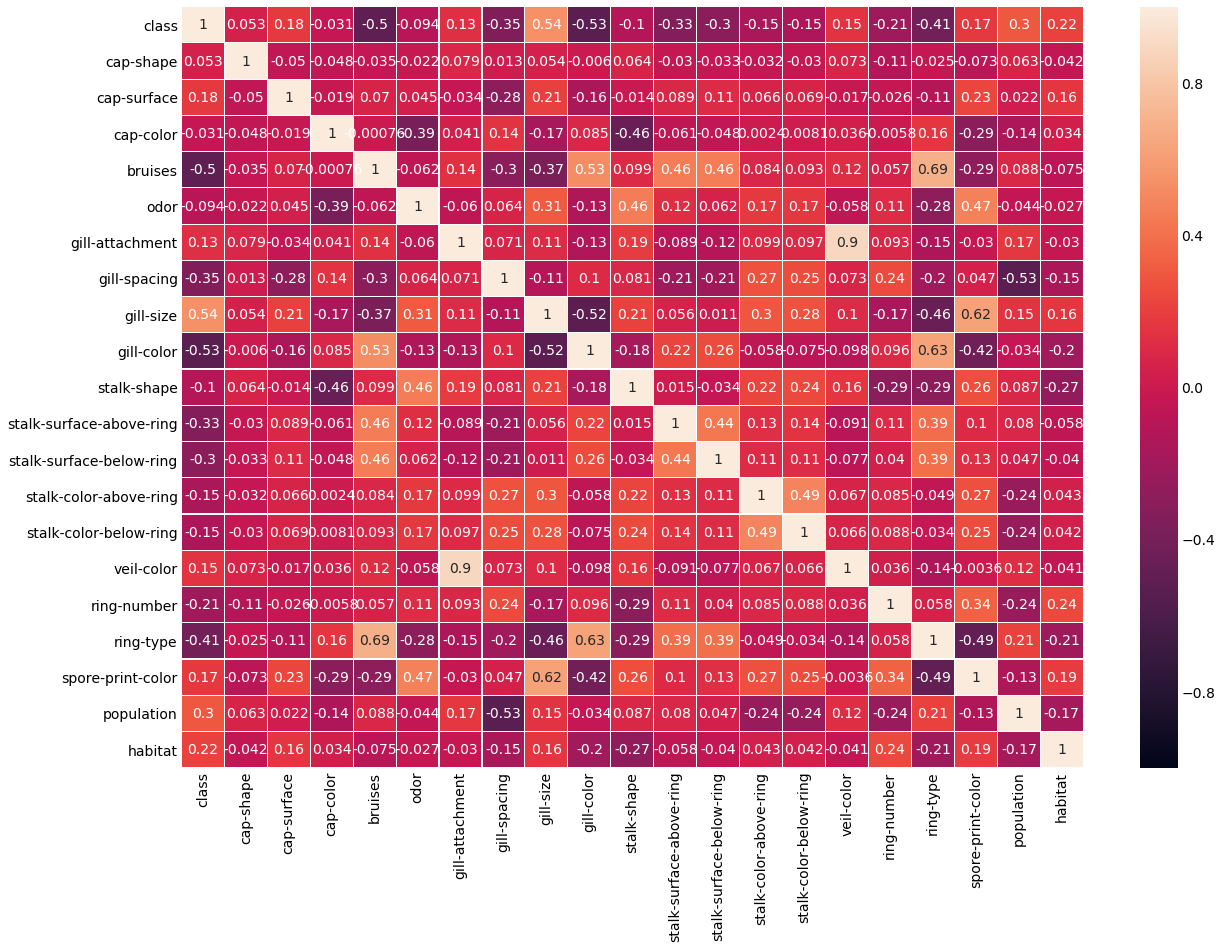

In [204]:
plt.figure(figsize=(18,14))
sns.heatmap(mushrooms_encoded.corr(),linewidths=.1,annot=True, vmin=-1, vmax=1)

#### Features with high correlation to class label:
1. gill-size: 0.54

2. gill-color: -0.53

3. bruises: -0.5

4. ring-type: 0.41

5. gill-spacing: -0.35



#### Features with high correlation to other features (should not be used together for training):
1. gill-attachment and veil-color: 0.9

2. ring-type vs bruises: 0.69

3. gill-color vs ring-type: 0.63

4. gill-size vs spore-print-color: 0.62

5. population vs gill-spacing: -0.53




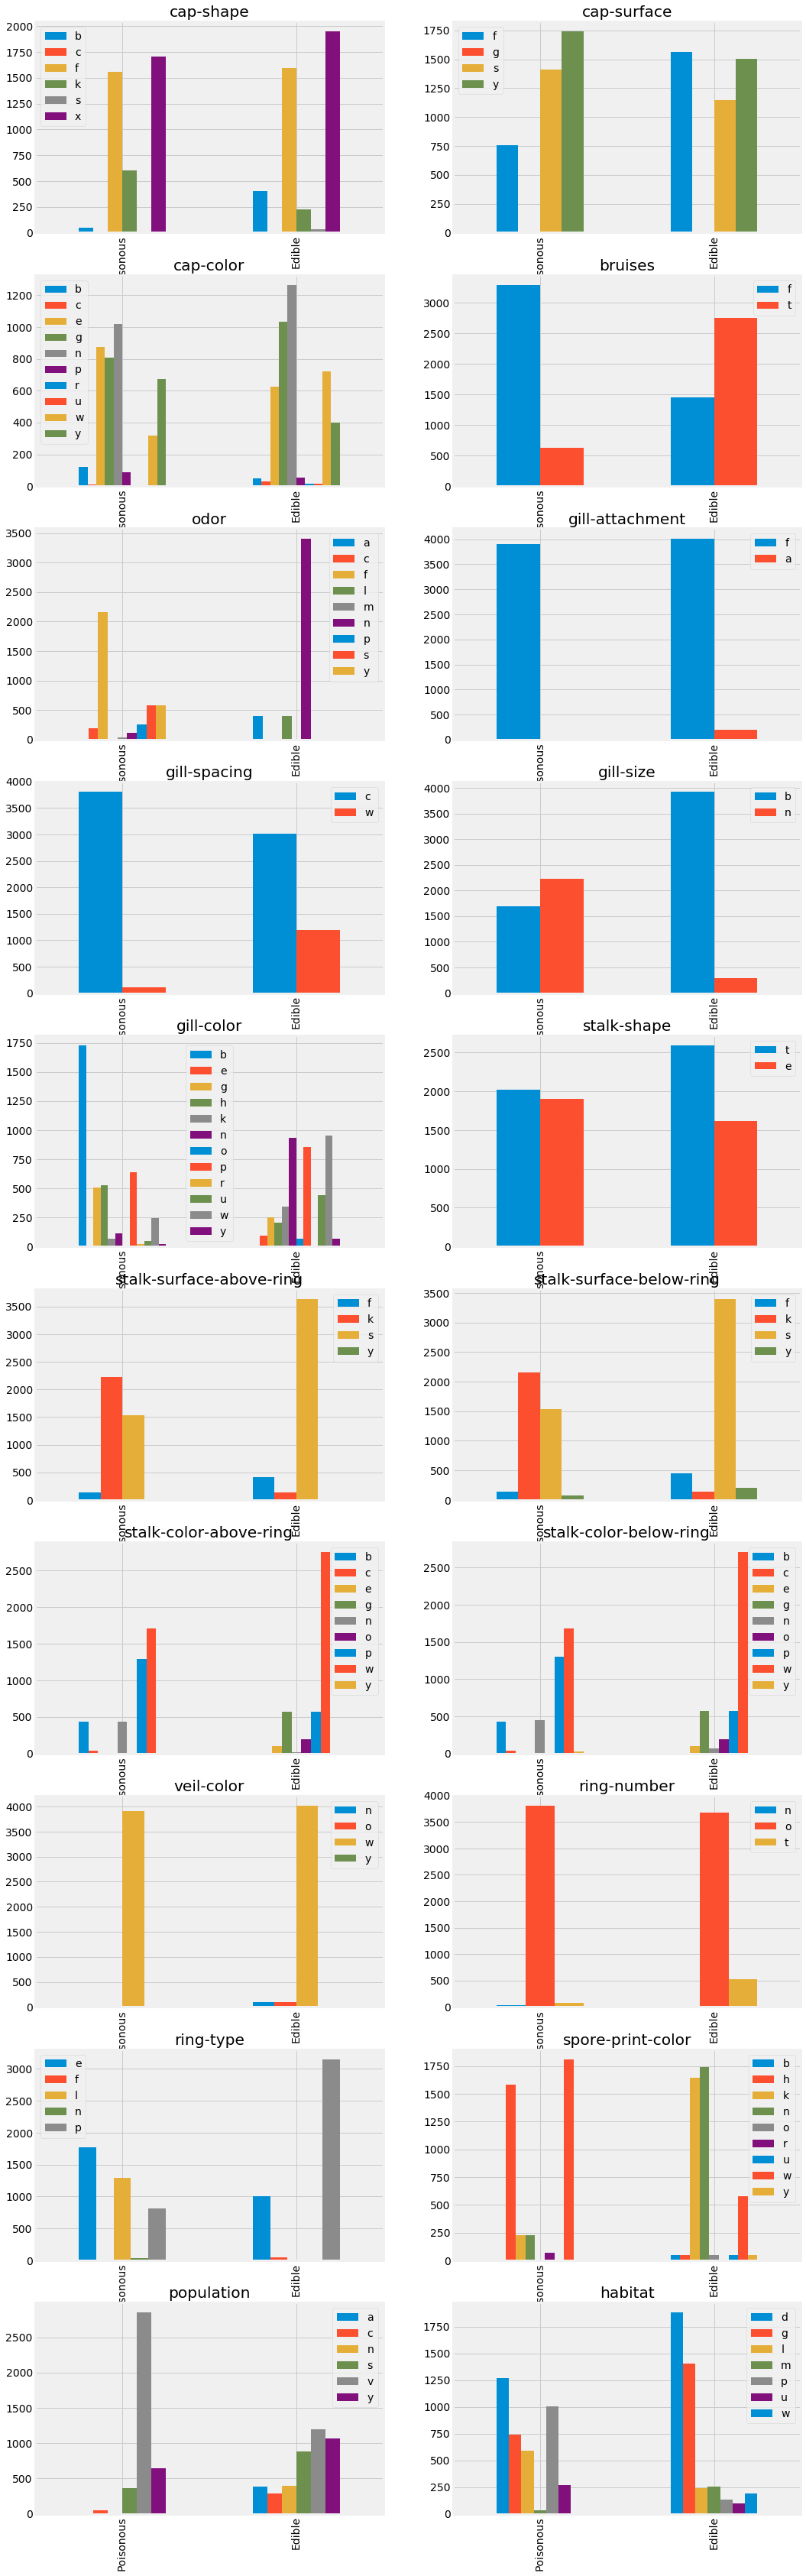

In [205]:
fig, axes = plt.subplots(nrows=10, ncols = 2, figsize=(16, 60))

rows = 0
cols = 0
for feature in mushrooms_data.columns:
    if(feature != 'class'):
        p = mushrooms_data[mushrooms_data['class']== 'p'][feature].value_counts()
        e = mushrooms_data[mushrooms_data['class']== 'e'][feature].value_counts()
        df = pd.DataFrame([p,e],index=['Poisonous','Edible'])
        df.plot(kind = 'bar',stacked = False, ax=axes[rows][cols], title = feature)
        if(cols == 1):
            rows += 1
            cols = 0
        else:
            cols += 1

#### Features that may be useful for class prediction:

##### bruises: 
- Majority of mushrooms with no bruises are poisonous
- Majority of mushrooms with bruises are edible

##### gill-size
- Majority of narrow gill-size are poisonous

##### gill-color
- Majority of poisonous mushrooms are of buff gil-color

##### ring-type
- Majority of edible mushrooms are of pendant ring type

##### population
- Majority of poisonous muchrooms are of several category


#### Features that are not useful for class prediction:

- cap-shape
- ring-number
- veil-color
- cap-surface
- cap-color

    


### 5. Use Logistic Regression to train the model using features with high correlation to class label

In [206]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [207]:
mushrooms_data_1 = pd.get_dummies(mushrooms_data[
    ['gill-color','gill-size','bruises','gill-spacing','class']], drop_first = True)
mushrooms_data_1.head()

,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,gill-size_n,bruises_t,gill-spacing_w,class_p
0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [208]:
LogReg1 = LogisticRegression()

In [209]:
X1 = mushrooms_data_1.drop('class_p', axis =1)
y1 = mushrooms_data_1['class_p']

In [210]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, train_size=0.7, random_state =42)

# fit model
LogReg1.fit(x_train1, y_train1)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [211]:
y_pred = LogReg1.predict(x_test1)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [212]:
metrics.accuracy_score(y_test1,y_pred)

0.9417555373256767

In [213]:
metrics.confusion_matrix(y_test1,y_pred)
#135 + 90 instances were misclassified

array([[1206,   51],
       [  91, 1090]])

In [214]:
metrics.roc_auc_score(y_test1,y_pred)

0.9411869315070155

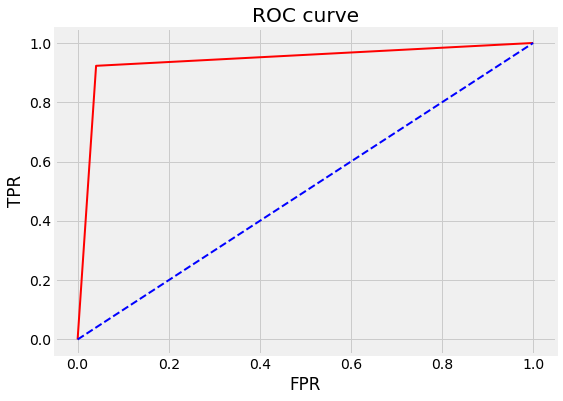

In [215]:
fpr,tpr,_=metrics.roc_curve(y_test1, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [216]:
print(metrics.classification_report(y_test1, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1257
          1       0.96      0.92      0.94      1181

avg / total       0.94      0.94      0.94      2438



### 6. Use Logistic Regression to train the model using most features in the dataset

In [217]:
mushroom_features_2 = [ 'class','bruises', 'odor','gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'spore-print-color', 'population', 'habitat']

In [218]:
mushrooms_data_2 = pd.get_dummies(mushrooms_data[mushroom_features_2], drop_first = True)
mushrooms_data_2.head()

,class_p,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [219]:
LogReg2 = LogisticRegression()

In [220]:
X2 = mushrooms_data_2.drop('class_p', axis =1)
y2 = mushrooms_data_2['class_p']

In [221]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2, train_size=0.6, random_state =42)

# fit model
LogReg2.fit(x_train2, y_train2)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [222]:
y_pred2 = LogReg2.predict(x_test2)
y_pred2

array([0, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [223]:
metrics.accuracy_score(y_test2,y_pred2)

0.9990769230769231

In [224]:
metrics.confusion_matrix(y_test2,y_pred2)

array([[1678,    0],
       [   3, 1569]])

In [225]:
metrics.roc_auc_score(y_test2,y_pred2)

0.9990458015267176

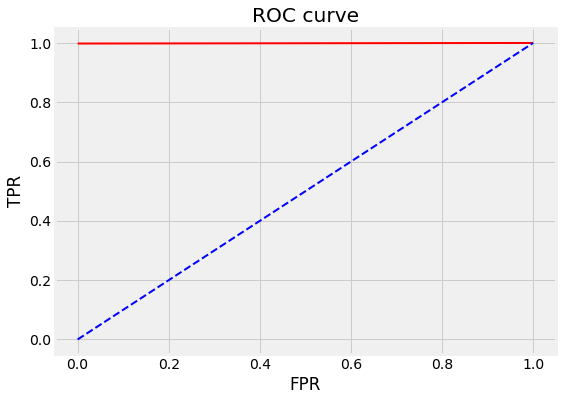

In [228]:
fpr,tpr,_=metrics.roc_curve(y_test2, y_pred2)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [229]:
print(metrics.classification_report(y_test2, y_pred2))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1678
          1       1.00      1.00      1.00      1572

avg / total       1.00      1.00      1.00      3250



### 7. Use Decision Tree Classification technique

In [230]:
from sklearn.tree import DecisionTreeClassifier

mushrooms_data_3 = pd.get_dummies(mushrooms_data[
    ['gill-color','gill-size','bruises','gill-spacing','class']], drop_first = True)

In [231]:
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)

In [232]:
X3 = mushrooms_data_3.drop('class_p', axis =1)
y3 = mushrooms_data_3['class_p']

In [233]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y3, train_size=0.7, random_state =42)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [234]:
treeclf.fit(x_train3, y_train3)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [235]:
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='./decisiontree1.dot', feature_names=x_train3.columns)

![decisiontree](./decisiontree2.png)

In [236]:
pd.DataFrame({'feature':x_train3.columns, 'importance':treeclf.feature_importances_})

,feature,importance
0,gill-color_e,0.000000
1,gill-color_g,0.000000
2,gill-color_h,0.051313
3,gill-color_k,0.003066
4,gill-color_n,0.035733
5,gill-color_o,0.031613
6,gill-color_p,0.008757
7,gill-color_r,0.010978
8,gill-color_u,0.000000
9,gill-color_w,0.019008


In [237]:
y_pred3 = treeclf.predict(x_test3)
y_pred3

array([0, 1, 1, ..., 1, 0, 0], dtype=uint8)

In [238]:
metrics.confusion_matrix(y_test3,y_pred3)

array([[1201,   56],
       [  77, 1104]])

In [239]:
metrics.accuracy_score(y_test3,y_pred3)

0.9454470877768663

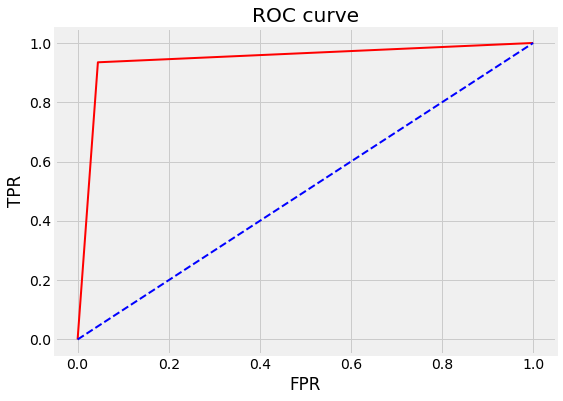

In [240]:
fpr,tpr,_=metrics.roc_curve(y_test3, y_pred3)
plt.figure()
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Conclusion

Both Logisitc Regression and Decisions Tree are able to correctly classify majority of the edible/poisonous mushroons

Using majority of the features for training improved the classification precision/recall

However, the 4 features identified ['gill-color','gill-size','bruises','gill-spacing'] provided relatively good classification results in identifying poisonous and edible mushrooms